In [68]:
import pandas as pd
import numpy as np
import pandas as pd
from mplsoccer.pitch import Pitch
import pandas as pd
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math
df=pd.read_csv(r'C:\Users\User\OneDrive\Pictures\CSV Files\FCBG.csv')

In [69]:
df

,Unnamed: 0,player,x,y,endx,endy,team,outcome,minute
0,0,135242,50.1,49.9,25.3,44.5,819,Successful,0
1,1,332990,30.3,41.9,59.0,83.3,819,Unsuccessful,0
2,2,90782,46.3,9.3,53.1,0.0,65,Unsuccessful,0
3,3,347178,43.0,100.0,61.4,90.3,819,Successful,0
4,4,80241,45.8,9.1,47.0,10.0,65,Successful,0
...,...,...,...,...,...,...,...,...,...
1077,1077,236511,53.2,96.0,72.6,82.0,65,Successful,94
1078,1078,243262,23.2,23.6,61.6,39.5,819,Unsuccessful,94
1079,1079,236511,32.2,65.8,33.7,65.2,65,Unsuccessful,94
1080,1080,422659,72.2,39.1,77.5,30.1,819,Successful,94


In [70]:
df=df[df['team']==65].reset_index()

In [71]:
df

,index,Unnamed: 0,player,x,y,endx,endy,team,outcome,minute
0,2,2,90782,46.3,9.3,53.1,0.0,65,Unsuccessful,0
1,4,4,80241,45.8,9.1,47.0,10.0,65,Successful,0
2,5,5,44721,47.0,10.0,46.9,2.5,65,Successful,0
3,6,6,328512,46.9,2.5,52.5,8.9,65,Successful,0
4,7,7,90782,52.3,11.0,38.6,33.3,65,Successful,0
...,...,...,...,...,...,...,...,...,...,...
713,1073,1073,110154,85.4,81.2,87.5,86.2,65,Successful,94
714,1074,1074,422937,91.7,82.7,87.0,71.8,65,Successful,94
715,1075,1075,422939,87.0,71.8,92.0,67.6,65,Unsuccessful,94
716,1077,1077,236511,53.2,96.0,72.6,82.0,65,Successful,94


In [72]:
df['beginning'] = np.sqrt(np.square(120-df['x']) + np.square(40 - df['y']))
df['end'] = np.sqrt(np.square(120 - df['endx']) + np.square(40 - df['endy']))

df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]

In [73]:
df=df[df['progressive']==True]

In [74]:
df

,index,Unnamed: 0,player,x,y,endx,endy,team,outcome,minute,beginning,end,progressive
27,30,30,44288,92.3,78.9,92.5,50.1,65,Unsuccessful,1,47.754581,29.296075,True
37,48,48,236511,47.8,80.2,85.1,73.3,65,Unsuccessful,3,82.637038,48.237952,True
59,73,73,236511,44.0,85.4,59.4,65.2,65,Successful,5,88.527736,65.630785,True
94,122,122,110154,99.5,99.5,96.8,51.9,65,Unsuccessful,9,62.932504,26.073933,True
106,134,134,44721,38.6,46.1,97.3,3.1,65,Successful,10,81.628243,43.323204,True
149,189,189,73494,51.0,82.3,69.9,10.3,65,Successful,13,80.933862,58.241738,True
169,221,221,80774,2.7,56.3,33.0,36.4,65,Unsuccessful,17,118.427108,87.074451,True
189,249,249,44288,87.5,95.6,86.8,71.4,65,Unsuccessful,20,64.401941,45.696827,True
192,253,253,44288,91.9,75.0,96.9,61.2,65,Unsuccessful,20,44.884407,31.353628,True
196,257,257,44288,78.6,73.8,87.4,54.2,65,Unsuccessful,21,53.445299,35.558403,True


In [75]:
df=df[df['outcome']=="Successful"]
df=df[df['minute']<60].reset_index()

In [76]:
df['passer'] = df['player']
df['recipient'] = df['player'].shift(-1)

In [77]:
pas = pd.to_numeric(df['passer'],downcast='integer')
rec = pd.to_numeric(df['recipient'],downcast='integer')
df['passer'] = pas
df['recipient'] = rec

In [78]:
df

,level_0,index,Unnamed: 0,player,x,y,endx,endy,team,outcome,minute,beginning,end,progressive,passer,recipient
0,59,73,73,236511,44.0,85.4,59.4,65.2,65,Successful,5,88.527736,65.630785,True,236511,44721.0
1,106,134,134,44721,38.6,46.1,97.3,3.1,65,Successful,10,81.628243,43.323204,True,44721,73494.0
2,149,189,189,73494,51.0,82.3,69.9,10.3,65,Successful,13,80.933862,58.241738,True,73494,110154.0
3,222,283,283,110154,57.9,26.4,77.1,36.7,65,Successful,22,63.571770,43.026736,True,110154,279423.0
4,284,417,417,279423,50.1,80.2,78.9,83.9,65,Successful,36,80.635290,60.136678,True,279423,80774.0
5,308,475,475,80774,6.8,48.1,61.7,7.3,65,Successful,42,113.489427,66.844446,True,80774,NaN


In [79]:
average_locations = df.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
average_locations.columns = ['x','y','count']

In [80]:
average_locations

,x,y,count
passer,,,
44721,38.6,46.1,1
73494,51.0,82.3,1
80774,6.8,48.1,1
110154,57.9,26.4,1
236511,44.0,85.4,1
279423,50.1,80.2,1


In [81]:
#now we need to find the number of passes between each player
pass_between = df.groupby(['passer','recipient']).index.count().reset_index()
pass_between.rename({'index':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

In [84]:

pass_between

,passer,recipient,pass_count,x,y,count,x_end,y_end,count_end
0,44721,73494.0,1,38.6,46.1,1,51.0,82.3,1
1,73494,110154.0,1,51.0,82.3,1,57.9,26.4,1
2,110154,279423.0,1,57.9,26.4,1,50.1,80.2,1
3,236511,44721.0,1,44.0,85.4,1,38.6,46.1,1
4,279423,80774.0,1,50.1,80.2,1,6.8,48.1,1


Text(0.5, 1.0, 'Barca Progressive Passing Network vs Getafe')

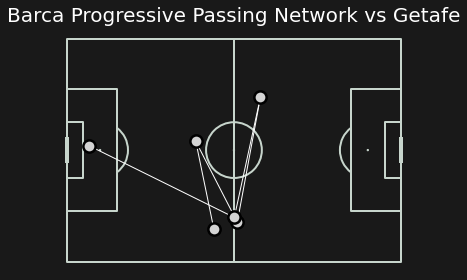

In [86]:
#plot the pitch

pitch = pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=True, tight_layout=False)
fig, ax = pitch.draw()

#plot the arrows

arrows = pitch.arrows(1.2*pass_between.x,.8*pass_between.y,1.2*pass_between.x_end,.8*pass_between.y_end,
                     width = 1, headwidth = 1, color = 'w', ax = ax, zorder = 1, alpha =1)

#plot the nodes

nodes = pitch.scatter(1.2*average_locations.x,.8*average_locations.y,
                     s = 150, color = '#d3d3d3', edgecolors = 'black', linewidth = 2.5, alpha = 1, zorder =2, ax=ax)

fig.set_facecolor('#191919')
ax.patch.set_facecolor('#191919')
plt.title('Barca Progressive Passing Network vs Getafe',color='white',size=20)